# Indiana Flood Risk
## Deep Neural Networks for Supervised Learning - Regression

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns  #Seaborn is another powerful visulization library for Python
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_excel("C:\\Users\jmatney\Documents\GitHub\IndianaRIsk\data\IN_22HUCS_05062020_new.xlsx")

In [3]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\jmatney\\Documents\\GitHub\\IndianaRisk'

In [4]:
print("Shape of the Dataset:",df.shape)
#the head method displays the first 5 rows of the data
df.head(5)  


Shape of the Dataset: (32, 42)


,subwatershed,area,perimeter,circulatory_ratio,relief,avg_slope,watershed_length,elongation_ratio,drainage_density,shape_factor,...,lu_24_area,lu_41_area,lu_82_area,avg_impervious_percent,orb100yr24ha_am,orb25yr24ha_am,orb2yr24ha_am,orb50yr24ha_am,policy_total_building_coverage_avg,claims_total_building_insurance_coverage_avg
0,50800030204,71.677298,46.020782,0.425288,71.490857,3.892551,21.657336,0.441104,5.281157,6.543776,...,0.021967,10.632549,52.330381,0.633946,5599.612793,4591.765625,2625.774658,5094.054199,25890.320120,33940.666450
1,51201020403,90.022814,54.601063,0.379455,42.432038,1.726250,16.964608,0.631084,4.668109,3.196945,...,0.016072,7.862318,76.583387,0.476848,5953.043457,4679.166504,2509.688477,5299.992676,50564.225580,14171.843030
2,51201061303,61.214067,56.265707,0.242982,28.827573,0.963398,10.675799,0.826952,4.797476,1.861871,...,0.030316,0.425820,57.837264,0.932902,6299.303223,4963.820312,2660.348389,5617.482910,14272.364260,6688.688164
3,51201130502,88.814228,62.557067,0.285194,60.097282,3.027722,22.169999,0.479657,4.508082,5.534123,...,0.098821,2.664403,76.516670,1.165766,7079.081543,5566.014648,2983.962891,6303.637207,3503.722054,1.671780
4,51202010605,85.414836,48.154895,0.462873,16.629288,1.359579,12.156831,0.857830,4.343422,1.730244,...,0.361117,1.436435,73.595816,2.224639,6162.261719,4884.453613,2649.507812,5509.884766,40334.518090,32054.838460


# Metadata
*	**subwatershed** - a unique Id for each subwatershed

### Data Exploration

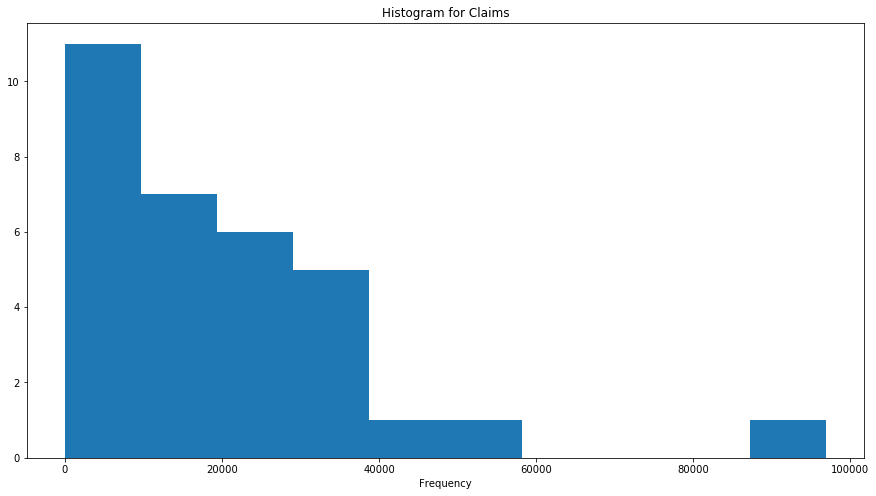

In [5]:
#Import matplotlib, python most popular data visualizing library
import matplotlib.pyplot as plt
%matplotlib inline

#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15,8)) 
plt.hist(df["claims_total_building_insurance_coverage_avg"])  
plt.title("Histogram for Claims")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()


In [6]:
#Use the  histogram function provided by the Pandas object
#The function returns a cross-tab histogram plot for all numeric columns in the data
# df.hist(figsize=(40,20))

In [7]:
df.isnull().sum()/df.shape[0] * 100

subwatershed                                    0.0
area                                            0.0
perimeter                                       0.0
circulatory_ratio                               0.0
relief                                          0.0
avg_slope                                       0.0
watershed_length                                0.0
elongation_ratio                                0.0
drainage_density                                0.0
shape_factor                                    0.0
relief_ratio                                    0.0
ruggedness                                      0.0
aae_area                                        0.0
buildings_aae_count                             0.0
x_area                                          0.0
buildings_x_count                               0.0
water_bodies_area                               0.0
dams_count                                      0.0
bridges_count                                   0.0
streets_km  

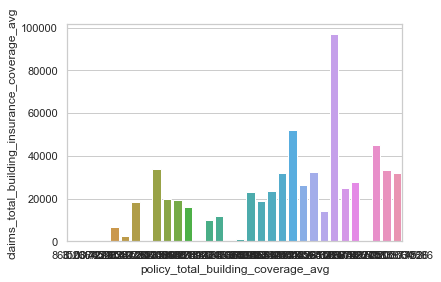

In [8]:
sns.set(style="whitegrid")
# actuaries prefer averages 

# Create the bar plot for Average Sales acrss different Seasons
ax = sns.barplot(x="policy_total_building_coverage_avg", y="claims_total_building_insurance_coverage_avg", data=df) 


### Data Engineering

In [9]:
#Define a variable for each type of feature
target = ["claims_total_building_insurance_coverage_avg"]
test = [x for x in df if x != "claims_total_building_insurance_coverage_avg"]
numeric_columns = [x for x in test if x != "subwatershed"]

In [10]:
print("Shape of Data:",df.shape)
print("Distinct Datatypes:",df.dtypes.unique())
df[numeric_columns].head(5)

Shape of Data: (32, 42)
Distinct Datatypes: [dtype('int64') dtype('float64')]


,area,perimeter,circulatory_ratio,relief,avg_slope,watershed_length,elongation_ratio,drainage_density,shape_factor,relief_ratio,...,lu_23_area,lu_24_area,lu_41_area,lu_82_area,avg_impervious_percent,orb100yr24ha_am,orb25yr24ha_am,orb2yr24ha_am,orb50yr24ha_am,policy_total_building_coverage_avg
0,71.677298,46.020782,0.425288,71.490857,3.892551,21.657336,0.441104,5.281157,6.543776,0.003301,...,0.077206,0.021967,10.632549,52.330381,0.633946,5599.612793,4591.765625,2625.774658,5094.054199,25890.320120
1,90.022814,54.601063,0.379455,42.432038,1.726250,16.964608,0.631084,4.668109,3.196945,0.002501,...,0.073834,0.016072,7.862318,76.583387,0.476848,5953.043457,4679.166504,2509.688477,5299.992676,50564.225580
2,61.214067,56.265707,0.242982,28.827573,0.963398,10.675799,0.826952,4.797476,1.861871,0.002700,...,0.076454,0.030316,0.425820,57.837264,0.932902,6299.303223,4963.820312,2660.348389,5617.482910,14272.364260
3,88.814228,62.557067,0.285194,60.097282,3.027722,22.169999,0.479657,4.508082,5.534123,0.002711,...,0.249153,0.098821,2.664403,76.516670,1.165766,7079.081543,5566.014648,2983.962891,6303.637207,3503.722054
4,85.414836,48.154895,0.462873,16.629288,1.359579,12.156831,0.857830,4.343422,1.730244,0.001368,...,0.832354,0.361117,1.436435,73.595816,2.224639,6162.261719,4884.453613,2649.507812,5509.884766,40334.518090


### Feature Selection using the LassoCV estimator

In [11]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

Automatically created module for IPython interactive environment


In [12]:
X = df[numeric_columns]

In [13]:
X.head(5)

,area,perimeter,circulatory_ratio,relief,avg_slope,watershed_length,elongation_ratio,drainage_density,shape_factor,relief_ratio,...,lu_23_area,lu_24_area,lu_41_area,lu_82_area,avg_impervious_percent,orb100yr24ha_am,orb25yr24ha_am,orb2yr24ha_am,orb50yr24ha_am,policy_total_building_coverage_avg
0,71.677298,46.020782,0.425288,71.490857,3.892551,21.657336,0.441104,5.281157,6.543776,0.003301,...,0.077206,0.021967,10.632549,52.330381,0.633946,5599.612793,4591.765625,2625.774658,5094.054199,25890.320120
1,90.022814,54.601063,0.379455,42.432038,1.726250,16.964608,0.631084,4.668109,3.196945,0.002501,...,0.073834,0.016072,7.862318,76.583387,0.476848,5953.043457,4679.166504,2509.688477,5299.992676,50564.225580
2,61.214067,56.265707,0.242982,28.827573,0.963398,10.675799,0.826952,4.797476,1.861871,0.002700,...,0.076454,0.030316,0.425820,57.837264,0.932902,6299.303223,4963.820312,2660.348389,5617.482910,14272.364260
3,88.814228,62.557067,0.285194,60.097282,3.027722,22.169999,0.479657,4.508082,5.534123,0.002711,...,0.249153,0.098821,2.664403,76.516670,1.165766,7079.081543,5566.014648,2983.962891,6303.637207,3503.722054
4,85.414836,48.154895,0.462873,16.629288,1.359579,12.156831,0.857830,4.343422,1.730244,0.001368,...,0.832354,0.361117,1.436435,73.595816,2.224639,6162.261719,4884.453613,2649.507812,5509.884766,40334.518090


In [14]:
y = df[target]
X = df[numeric_columns]

## Lasso Feature Selection 

In [15]:
lasso_clf = LassoCV().fit(X, y.values.ravel())
lasso_importance = np.abs(lasso_clf.coef_)
print(lasso_importance)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00465607 0.0047908  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.37572584]


## Ridge Feature Selection

In [16]:
ridge_clf = Ridge().fit(X, y.values.ravel())
ridge_importance = np.abs(ridge_clf.coef_)
np.round(ridge_importance,3)

array([1.489450e+03, 4.655660e+02, 3.673520e+02, 9.906600e+01,
       3.313821e+03, 2.204836e+03, 7.435520e+02, 2.073830e+02,
       9.145910e+02, 6.037000e+00, 7.425660e+02, 2.155360e+02,
       4.659000e+00, 3.849150e+02, 3.534000e+00, 4.741830e+03,
       3.234942e+03, 1.318748e+03, 7.084800e+01, 5.584500e+02,
       1.306000e+00, 9.435000e+00, 3.430000e-01, 4.616800e+01,
       1.099000e+00, 2.977421e+03, 3.900720e+02, 5.206620e+02,
       1.225591e+03, 5.088701e+03, 1.913463e+03, 1.282108e+03,
       5.780720e+02, 1.095596e+03, 2.783771e+03, 7.307590e+02,
       2.999120e+02, 2.978940e+02, 1.228825e+03, 6.870000e-01])

In [17]:
ridge_importance = np.abs(ridge_clf.coef_)
np.round(ridge_importance,3)

feature_names = numeric_columns
idx_third = ridge_importance.argsort()[-3]
print(ridge_importance.argsort())

ridge_threshold = ridge_importance[idx_third] + 10
print('Threshold is: {}'.format(ridge_threshold))

# # How many features do we want?
# # Get the indicies
idx_features = (-ridge_importance).argsort()[:10]

# # subset by the indicies
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

[22 39 24 20 14 12  9 21 23 18  3  7 11 37 36  2 13 26  1 27 19 32 35 10
  6  8 33 28 38 31 17  0 30  5 34 25 16  4 15 29]
Threshold is: 3323.820533597778
Selected features: ['lu_22_area' 'water_bodies_area' 'avg_slope' 'dams_count'
 'dependent_population_pct' 'avg_impervious_percent' 'watershed_length'
 'lu_23_area' 'area' 'bridges_count']


In [18]:
# ridge_threshold = ridge_importance[idx_third] + 10
# print('Threshold is: {}'.format(ridge_threshold))

In [19]:
# # How many features do we want?
# # Get the indicies
# idx_features = (-ridge_importance).argsort()[:10]

# # subset by the indicies
# name_features = np.array(feature_names)[idx_features]
# print('Selected features: {}'.format(name_features))

In [20]:
# sfm = SelectFromModel(ridge_clf, threshold=ridge_threshold)
# sfm.fit(X, y.values.ravel())
# X_transform = sfm.transform(X)

# n_features = sfm.transform(X).shape[1]

### Min Max Normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df_scale = scaler.transform(df)
np.round(df_scale, 3)

array([[0.   , 0.358, 0.153, ..., 0.151, 0.382, 0.35 ],
       [0.02 , 0.579, 0.268, ..., 0.292, 0.746, 0.146],
       [0.02 , 0.232, 0.291, ..., 0.511, 0.211, 0.069],
       ...,
       [0.02 , 0.253, 0.159, ..., 1.   , 0.917, 0.001],
       [1.   , 0.238, 0.14 , ..., 0.808, 0.   , 0.   ],
       [0.02 , 0.134, 0.034, ..., 0.   , 0.51 , 0.01 ]])

In [22]:
df_scale_dataframe = pd.DataFrame(df_scale, columns = df.columns.values)

In [ ]:
# df_scale_dataframe.hist(figsize=(40,20))
# df_scale_dataframe.to_csv("IN_ML_scale.csv")

In [23]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\jmatney\\Documents\\GitHub\\IndianaRisk'

## Train Test Split

In [24]:
#Create train and test dataset with an 80:20 split
x_train, x_test, y_train, y_test = train_test_split(df_scale_dataframe[numeric_columns],df_scale_dataframe[target],test_size=0.2,random_state=2018)
# Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=2018)

#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (22, 40)
Shape of x_val: (3, 40)
Shape of x_test: (7, 40)
Shape of y_train: (22, 1)
Shape of y_val: (3, 1)
Shape of y_test: (7, 1)


## Modelling a ridge regression in Python

In [25]:
###Model Ridge regression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
cross_val_score(Ridge(), x_train, y_train, scoring= "neg_mean_squared_error", cv = 5)

array([-0.01438054, -0.15320472, -0.02616396, -0.02974715, -0.04558111])

In [26]:
# Let’s look at the coefficients of the model:
rmse_ridge = np.sqrt(-cross_val_score(Ridge(), x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_ridge

array([0.1199189 , 0.39141374, 0.16175278, 0.17247363, 0.21349732])

C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.03168e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using 

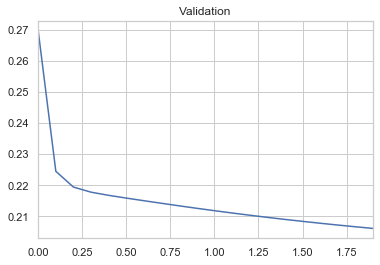

In [28]:
# sns.set_style("white")
# # Now let us look at a chart about the coefficients in the model:
alphas = np.arange(0,2,0.1)
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
# plt.xlabel("alpha")
# plt.ylabel("rmse")

In [29]:
cv_ridge[cv_ridge.values == cv_ridge.min()]

1.9    0.206106
dtype: float64

In [30]:
ridge_clf = Ridge(alpha = 0.7).fit(x_train, y_train.values.ravel())

In [31]:
clf = LassoCV().fit(x_train, y_train)
importance = np.abs(clf.coef_)
print(importance)

idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.001

idx_features = (-importance).argsort()[:2]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

sfm = SelectFromModel(clf, threshold=threshold)
sfm.fit(x_train, y_train)
X_transform = sfm.transform(X)

n_features = sfm.transform(X).shape[1]

C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013761010122804833, tolerance: 0.00011009122596995732
  positive)
C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001445531472562731, tolerance: 0.00011009122596995732
  positive)
C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: C

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.24865415
 0.         0.         0.         0.13450916 0.         0.
 0.03716742 0.         0.         0.         0.         0.
 0.         0.         0.22842325 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.31656662]
Selected features: ['policy_total_building_coverage_avg' 'aae_area']


C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001445531472562731, tolerance: 0.00011009122596995732
  positive)
C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00014977066691494127, tolerance: 0.00011009122596995732
  positive)
C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001519455696740368, tolerance: 0.00011009122596995732
  positive)
C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coord

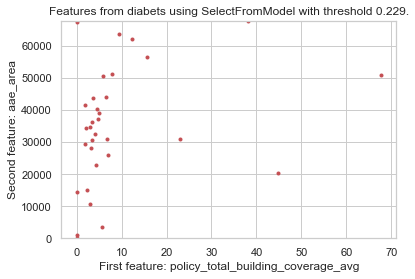

In [32]:
plt.title(
    "Features from diabets using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("First feature: {}".format(name_features[0]))
plt.ylabel("Second feature: {}".format(name_features[1]))
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [33]:
ridge_importance = np.abs(ridge_clf.coef_)
np.round(ridge_importance,3)

feature_names = numeric_columns
idx_third = ridge_importance.argsort()[-3]
print(ridge_importance.argsort())

ridge_threshold = ridge_importance[idx_third] + 0.000001
print('Threshold is: {}'.format(ridge_threshold))

# # How many features do we want?
# # Get the indicies
idx_features = (-ridge_importance).argsort()

# # subset by the indicies
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

[32 17  9 19  2 31  3 37 16 22  0 12 25  1  4  5 30 14 36 33 38 35 28 20
 34  8 10  7 21 23 29 18 24 13  6 15 27 11 26 39]
Threshold is: 0.15133644625069614
Selected features: ['policy_total_building_coverage_avg' 'dist_to_stream_avg (m)' 'aae_area'
 'dist_to_stream_stdev (m)' 'water_bodies_area' 'elongation_ratio'
 'x_area' 'population_change' 'streets_km' 'lu_22_area' 'housing_density'
 'population_density' 'drainage_density' 'ruggedness' 'shape_factor'
 'avg_impervious_percent' 'population' 'lu_21_area' 'orb100yr24ha_am'
 'orb50yr24ha_am' 'lu_82_area' 'orb25yr24ha_am' 'buildings_x_count'
 'lu_23_area' 'watershed_length' 'avg_slope' 'perimeter'
 'dependent_population_pct' 'buildings_aae_count' 'area'
 'avg_median_income' 'dams_count' 'orb2yr24ha_am' 'relief' 'lu_24_area'
 'circulatory_ratio' 'railroads_km' 'relief_ratio' 'bridges_count'
 'lu_41_area']


In [34]:
# ###Model Lasso regression
# coef = pd.Series(model_ridge.coef_, index = x_train.columns)
# coef.head()

In [35]:
# ###Model Lasso regression
# model_lasso = LassoCV(alphas=alphas).fit(x_train, y_train.values.ravel())
# coef = pd.Series(model_lasso.coef_, index = x_train.columns)
# print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [36]:
# imp_coef = pd.concat([coef.sort_values().head(10),
#                      coef.sort_values().tail(10)])
# matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
# imp_coef.plot(kind = "barh")
# plt.title("Coefficients in the Lasso Model")

In [37]:
# import matplotlib
# imp_coef = pd.concat([coef.sort_values().head(10),
#                      coef.sort_values().tail(10)])
# matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
# imp_coef.plot(kind = "barh")
# plt.title("Coefficients in the Lasso Model")

### Creating Baseline Accuracy

In [38]:
#calcualte the average score of the train dataset
mean_claims = y_train.mean()
print("Average Claims :",mean_claims) 

Average Claims : claims_total_building_insurance_coverage_avg    0.205468
dtype: float64


In [39]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_claims).mean()[0])

MAE for Test Data: 0.15119119500145323


# ------------ GLM -----------------

In [40]:
# pip uninstall h2o

In [41]:
# import h2o

# -------------- Deep Learning ------------------
### Designing the Deep Neural Network

In [42]:
#Create Deep Neural Network Architecuture
from keras import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(150,input_dim = 40, activation="relu", use_bias=True))
model.add(Dense(1, activation = "linear"))

#Configure the model
model.compile(optimizer='adam', loss="mean_absolute_error", metrics=["mean_absolute_error"])

#Train the model
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=100,batch_size=64)

result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Using TensorFlow backend.


Train on 22 samples, validate on 3 samples
Epoch 1/100
22/22 [==============================] - 0s 10ms/step - loss: 0.1823 - mean_absolute_error: 0.1823 - val_loss: 0.0837 - val_mean_absolute_error: 0.0837
Epoch 2/100
22/22 [==============================] - 0s 182us/step - loss: 0.1645 - mean_absolute_error: 0.1645 - val_loss: 0.0954 - val_mean_absolute_error: 0.0954
Epoch 3/100
22/22 [==============================] - 0s 91us/step - loss: 0.1555 - mean_absolute_error: 0.1555 - val_loss: 0.0804 - val_mean_absolute_error: 0.0804
Epoch 4/100
22/22 [==============================] - 0s 91us/step - loss: 0.1435 - mean_absolute_error: 0.1435 - val_loss: 0.0664 - val_mean_absolute_error: 0.0664
Epoch 5/100
22/22 [==============================] - 0s 136us/step - loss: 0.1338 - mean_absolute_error: 0.1338 - val_loss: 0.0572 - val_mean_absolute_error: 0.0572
Epoch 6/100
22/22 [==============================] - 0s 137us/step - loss: 0.1238 - mean_absolute_error: 0.1238 - val_loss: 0.0461 - va

Epoch 51/100
22/22 [==============================] - 0s 136us/step - loss: 0.0211 - mean_absolute_error: 0.0211 - val_loss: 0.1329 - val_mean_absolute_error: 0.1329
Epoch 52/100
22/22 [==============================] - 0s 136us/step - loss: 0.0214 - mean_absolute_error: 0.0214 - val_loss: 0.1336 - val_mean_absolute_error: 0.1336
Epoch 53/100
22/22 [==============================] - 0s 91us/step - loss: 0.0211 - mean_absolute_error: 0.0211 - val_loss: 0.1342 - val_mean_absolute_error: 0.1342
Epoch 54/100
22/22 [==============================] - 0s 136us/step - loss: 0.0215 - mean_absolute_error: 0.0215 - val_loss: 0.1307 - val_mean_absolute_error: 0.1307
Epoch 55/100
22/22 [==============================] - 0s 136us/step - loss: 0.0193 - mean_absolute_error: 0.0193 - val_loss: 0.1293 - val_mean_absolute_error: 0.1293
Epoch 56/100
22/22 [==============================] - 0s 136us/step - loss: 0.0200 - mean_absolute_error: 0.0200 - val_loss: 0.1323 - val_mean_absolute_error: 0.1323
Epoch

7/7 [==============================] - 0s 143us/step
Metric  loss : 0.12
Metric  mean_absolute_error : 0.12


In [43]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(x_test,y_test)

#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

7/7 [==============================] - 0s 0us/step
Metric  loss : 0.12
Metric  mean_absolute_error : 0.12


In [44]:
model = Sequential()
model.add(Dense(150,input_dim = 40, activation="relu", use_bias=True))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

history = model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=10,batch_size=64)

#result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))


Train on 22 samples, validate on 3 samples
Epoch 1/10
22/22 [==============================] - 0s 14ms/step - loss: 0.0722 - mean_absolute_error: 0.1897 - val_loss: 0.0127 - val_mean_absolute_error: 0.0999
Epoch 2/10
22/22 [==============================] - 0s 182us/step - loss: 0.0491 - mean_absolute_error: 0.1492 - val_loss: 0.0211 - val_mean_absolute_error: 0.1201
Epoch 3/10
22/22 [==============================] - 0s 182us/step - loss: 0.0477 - mean_absolute_error: 0.1798 - val_loss: 0.0184 - val_mean_absolute_error: 0.1163
Epoch 4/10
22/22 [==============================] - 0s 182us/step - loss: 0.0398 - mean_absolute_error: 0.1646 - val_loss: 0.0099 - val_mean_absolute_error: 0.0726
Epoch 5/10
22/22 [==============================] - 0s 136us/step - loss: 0.0293 - mean_absolute_error: 0.1218 - val_loss: 0.0056 - val_mean_absolute_error: 0.0594
Epoch 6/10
22/22 [==============================] - 0s 136us/step - loss: 0.0245 - mean_absolute_error: 0.0898 - val_loss: 0.0062 - val_me

In [45]:
# model = Sequential()
# model.add(Dense(150,input_dim = 40, activation="relu", use_bias=True))
# model.add(Dense(1, activation = "linear"))

# #Configure the model
# model.compile(optimizer='adam', loss="mean_absolute_error", metrics=["mean_absolute_error"])

# #Train the model
# model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=100,batch_size=64)

model = Sequential()
model.add(Dense(150, input_dim = 40, activation="relu", use_bias=True))
model.add(Dense(150, activation="relu", use_bias=True))
model.add(Dense(150, activation="relu", use_bias=True))
model.add(Dense(150, activation="relu", use_bias=True))
model.add(Dense(150, activation="relu", use_bias=True))
model.add(Dense(1, activation = "linear", use_bias=True))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=30,batch_size=64)

result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Train on 22 samples, validate on 3 samples
Epoch 1/30
22/22 [==============================] - 0s 20ms/step - loss: 0.0938 - mean_absolute_error: 0.2127 - val_loss: 0.0159 - val_mean_absolute_error: 0.1224
Epoch 2/30
22/22 [==============================] - 0s 136us/step - loss: 0.0568 - mean_absolute_error: 0.1554 - val_loss: 0.0149 - val_mean_absolute_error: 0.0906
Epoch 3/30
22/22 [==============================] - 0s 182us/step - loss: 0.0457 - mean_absolute_error: 0.1509 - val_loss: 0.0243 - val_mean_absolute_error: 0.1136
Epoch 4/30
22/22 [==============================] - 0s 182us/step - loss: 0.0470 - mean_absolute_error: 0.1776 - val_loss: 0.0248 - val_mean_absolute_error: 0.1179
Epoch 5/30
22/22 [==============================] - 0s 227us/step - loss: 0.0423 - mean_absolute_error: 0.1723 - val_loss: 0.0182 - val_mean_absolute_error: 0.0947
Epoch 6/30
22/22 [==============================] - 0s 182us/step - loss: 0.0340 - mean_absolute_error: 0.1463 - val_loss: 0.0127 - val_me

In [46]:
model = Sequential()
model.add(Dense(350,input_dim = 40,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64)

result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))


Train on 22 samples, validate on 3 samples
Epoch 1/15
22/22 [==============================] - 0s 12ms/step - loss: 0.0686 - mean_absolute_error: 0.1676 - val_loss: 0.0272 - val_mean_absolute_error: 0.1539
Epoch 2/15
22/22 [==============================] - 0s 227us/step - loss: 0.0573 - mean_absolute_error: 0.2085 - val_loss: 0.0282 - val_mean_absolute_error: 0.1525
Epoch 3/15
22/22 [==============================] - 0s 227us/step - loss: 0.0431 - mean_absolute_error: 0.1850 - val_loss: 0.0113 - val_mean_absolute_error: 0.0723
Epoch 4/15
22/22 [==============================] - 0s 227us/step - loss: 0.0216 - mean_absolute_error: 0.1066 - val_loss: 0.0128 - val_mean_absolute_error: 0.1100
Epoch 5/15
22/22 [==============================] - 0s 227us/step - loss: 0.0217 - mean_absolute_error: 0.1045 - val_loss: 0.0172 - val_mean_absolute_error: 0.1272
Epoch 6/15
22/22 [==============================] - 0s 273us/step - loss: 0.0202 - mean_absolute_error: 0.1120 - val_loss: 0.0186 - val_me

### Training the model with increased number of epochs

In [47]:
from keras.callbacks import History
from keras.callbacks import EarlyStopping, ModelCheckpoint

history = History()
callbacks = [EarlyStopping(monitor='val_accuracy', patience=3), history] # Early Stopping

model = Sequential()
model.add(Dense(350,input_dim = 40,activation="relu"))
model.add(Dropout(0.2, input_shape=(40,)))
model.add(Dense(350,activation="relu"))
model.add(Dropout(0.2, input_shape=(40,)))
model.add(Dense(350,activation="relu"))
model.add(Dropout(0.2, input_shape=(40,)))
model.add(Dense(350,activation="relu"))
model.add(Dropout(0.2, input_shape=(40,)))
model.add(Dense(350,activation="relu"))
model.add(Dropout(0.2, input_shape=(40,)))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val), 
epochs=150,batch_size=64,callbacks=callbacks)

result = model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))


Train on 22 samples, validate on 3 samples
Epoch 1/150
22/22 [==============================] - 1s 38ms/step - loss: 0.0922 - mean_absolute_error: 0.2130 - val_loss: 0.0194 - val_mean_absolute_error: 0.0876
Epoch 2/150
22/22 [==============================] - 0s 455us/step - loss: 0.0742 - mean_absolute_error: 0.2257 - val_loss: 0.0153 - val_mean_absolute_error: 0.0791
Epoch 3/150
22/22 [==============================] - 0s 455us/step - loss: 0.0461 - mean_absolute_error: 0.1794 - val_loss: 0.0125 - val_mean_absolute_error: 0.1059
Epoch 4/150
22/22 [==============================] - 0s 500us/step - loss: 0.0517 - mean_absolute_error: 0.1675 - val_loss: 0.0172 - val_mean_absolute_error: 0.1294
Epoch 5/150
22/22 [==============================] - 0s 454us/step - loss: 0.0506 - mean_absolute_error: 0.1469 - val_loss: 0.0210 - val_mean_absolute_error: 0.1403
Epoch 6/150
22/22 [==============================] - 0s 455us/step - loss: 0.0514 - mean_absolute_error: 0.1582 - val_loss: 0.0179 - 

C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: val_loss,val_mean_absolute_error,loss,mean_absolute_error
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


22/22 [==============================] - 0s 546us/step - loss: 0.0234 - mean_absolute_error: 0.1016 - val_loss: 0.0109 - val_mean_absolute_error: 0.0931
Epoch 15/150
22/22 [==============================] - 0s 591us/step - loss: 0.0279 - mean_absolute_error: 0.1090 - val_loss: 0.0134 - val_mean_absolute_error: 0.0965
Epoch 16/150
22/22 [==============================] - 0s 636us/step - loss: 0.0096 - mean_absolute_error: 0.0811 - val_loss: 0.0201 - val_mean_absolute_error: 0.1173
Epoch 17/150
22/22 [==============================] - 0s 500us/step - loss: 0.0188 - mean_absolute_error: 0.1094 - val_loss: 0.0193 - val_mean_absolute_error: 0.1139
Epoch 18/150
22/22 [==============================] - 0s 500us/step - loss: 0.0152 - mean_absolute_error: 0.1053 - val_loss: 0.0151 - val_mean_absolute_error: 0.1118
Epoch 19/150
22/22 [==============================] - 0s 591us/step - loss: 0.0095 - mean_absolute_error: 0.0704 - val_loss: 0.0184 - val_mean_absolute_error: 0.1299
Epoch 20/150
22/2

Epoch 64/150
22/22 [==============================] - 0s 455us/step - loss: 0.0112 - mean_absolute_error: 0.0631 - val_loss: 0.0396 - val_mean_absolute_error: 0.1534
Epoch 65/150
22/22 [==============================] - 0s 500us/step - loss: 0.0054 - mean_absolute_error: 0.0558 - val_loss: 0.0383 - val_mean_absolute_error: 0.1603
Epoch 66/150
22/22 [==============================] - 0s 455us/step - loss: 0.0049 - mean_absolute_error: 0.0463 - val_loss: 0.0378 - val_mean_absolute_error: 0.1656
Epoch 67/150
22/22 [==============================] - 0s 409us/step - loss: 0.0050 - mean_absolute_error: 0.0496 - val_loss: 0.0318 - val_mean_absolute_error: 0.1628
Epoch 68/150
22/22 [==============================] - 0s 455us/step - loss: 0.0109 - mean_absolute_error: 0.0649 - val_loss: 0.0221 - val_mean_absolute_error: 0.1463
Epoch 69/150
22/22 [==============================] - 0s 500us/step - loss: 0.0027 - mean_absolute_error: 0.0453 - val_loss: 0.0171 - val_mean_absolute_error: 0.1306
Epoc

Epoch 114/150
22/22 [==============================] - 0s 500us/step - loss: 0.0030 - mean_absolute_error: 0.0337 - val_loss: 0.0143 - val_mean_absolute_error: 0.1020
Epoch 115/150
22/22 [==============================] - 0s 500us/step - loss: 0.0034 - mean_absolute_error: 0.0321 - val_loss: 0.0165 - val_mean_absolute_error: 0.1030
Epoch 116/150
22/22 [==============================] - 0s 454us/step - loss: 0.0034 - mean_absolute_error: 0.0353 - val_loss: 0.0201 - val_mean_absolute_error: 0.1054
Epoch 117/150
22/22 [==============================] - 0s 455us/step - loss: 0.0013 - mean_absolute_error: 0.0295 - val_loss: 0.0241 - val_mean_absolute_error: 0.1087
Epoch 118/150
22/22 [==============================] - 0s 500us/step - loss: 0.0038 - mean_absolute_error: 0.0405 - val_loss: 0.0247 - val_mean_absolute_error: 0.1120
Epoch 119/150
22/22 [==============================] - 0s 455us/step - loss: 0.0027 - mean_absolute_error: 0.0385 - val_loss: 0.0241 - val_mean_absolute_error: 0.115

### Visualing the final results

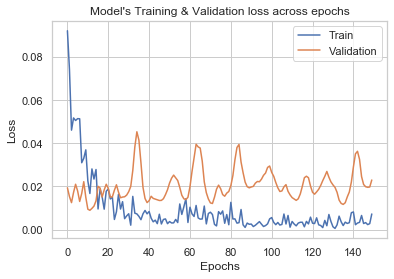

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [49]:
#Manually predicting from the model, instead of using model's evaluate function
y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Claims","Predicted Claims"]
print(y_test.head(10))

# #Manually predicting from the model, instead of using model's evaluate function
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :",mean_squared_error(y_test["Actual Claims"].values,y_test["Predicted Claims"].values))
print("MAE :",mean_absolute_error(y_test["Actual Claims"].values,y_test["Predicted Claims"].values))

    Actual Claims  Predicted Claims
14       0.327271          0.216806
3        0.000017          0.013285
29       0.000725          0.303007
28       0.122222          0.300757
27       0.464051          0.461543
4        0.330735          0.260845
1        0.146222          0.330528
MSE : 0.024926753683048693
MAE : 0.12303623629781477


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 45484490.63571
Feature: 21, Score: 70896197.20936
Feature: 22, Score: -2137676.78665
Feature: 23, Score: 0.00000
Feature: 24, Score: 793899.52328
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feat

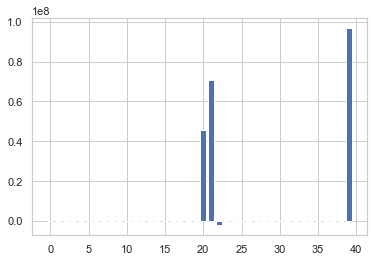

In [50]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [51]:
X

,area,perimeter,circulatory_ratio,relief,avg_slope,watershed_length,elongation_ratio,drainage_density,shape_factor,relief_ratio,...,lu_23_area,lu_24_area,lu_41_area,lu_82_area,avg_impervious_percent,orb100yr24ha_am,orb25yr24ha_am,orb2yr24ha_am,orb50yr24ha_am,policy_total_building_coverage_avg
0,71.677298,46.020782,0.425288,71.490857,3.892551,21.657336,0.441104,5.281157,6.543776,0.003301,...,0.077206,0.021967,10.632549,52.330381,0.633946,5599.612793,4591.765625,2625.774658,5094.054199,25890.320120
1,90.022814,54.601063,0.379455,42.432038,1.726250,16.964608,0.631084,4.668109,3.196945,0.002501,...,0.073834,0.016072,7.862318,76.583387,0.476848,5953.043457,4679.166504,2509.688477,5299.992676,50564.225580
2,61.214067,56.265707,0.242982,28.827573,0.963398,10.675799,0.826952,4.797476,1.861871,0.002700,...,0.076454,0.030316,0.425820,57.837264,0.932902,6299.303223,4963.820312,2660.348389,5617.482910,14272.364260
3,88.814228,62.557067,0.285194,60.097282,3.027722,22.169999,0.479657,4.508082,5.534123,0.002711,...,0.249153,0.098821,2.664403,76.516670,1.165766,7079.081543,5566.014648,2983.962891,6303.637207,3503.722054
4,85.414836,48.154895,0.462873,16.629288,1.359579,12.156831,0.857830,4.343422,1.730244,0.001368,...,0.832354,0.361117,1.436435,73.595816,2.224639,6162.261719,4884.453613,2649.507812,5509.884766,40334.518090
5,88.482299,76.322877,0.190878,78.148281,4.050000,28.472564,0.372784,0.790956,9.162136,0.002745,...,13.720000,4.400000,8.230000,0.090000,29.750000,5893.022949,4785.931641,2698.500000,5336.211914,51263.926400
6,51.500430,49.690827,0.262101,84.497872,2.590000,22.401481,0.361480,0.844906,9.744120,0.003772,...,6.950000,2.880000,2.650000,0.240000,27.500000,5993.157715,4837.552734,2701.723633,5409.420898,36340.186050
7,84.595867,75.123204,0.188370,79.277004,3.260000,25.074297,0.413905,1.016808,7.432046,0.003162,...,11.570000,5.540000,2.250000,0.060000,28.350000,5925.576172,4798.815918,2693.575928,5357.832031,56374.227010
8,70.790345,55.883574,0.284850,82.916985,2.480000,20.348676,0.466558,1.196911,5.849225,0.004075,...,15.530000,8.110000,2.390000,0.070000,38.980000,5993.288086,4845.648438,2714.981934,5414.107910,44122.704820
9,54.559599,58.231638,0.202192,81.845429,3.610000,17.736718,0.469913,0.966828,5.766009,0.004614,...,10.550000,4.110000,1.790000,0.970000,34.390000,5955.770996,4830.373535,2720.566162,5389.494141,37299.242560
